# МОДЕЛЬ ПРЕДСКАЗАНИЯ ЦЕНЫ НА НЕДВИЖИМОСТЬ

### Подключение библиотек 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [2]:
df_train = pd.read_csv('C:\\Users\\ELENA\\Downloads\\train.csv')
df_test = pd.read_csv('C:\\Users\\ELENA\\Downloads\\test.csv')

### Описание датасета

### Приведение типов


In [7]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
df_train['DistrictId'] = df_train['DistrictId'].astype(str)

In [9]:
df_test['DistrictId'] = df_test['DistrictId'].astype(str)

### Обработка пропусков

In [10]:
df_train.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [18]:
df_test.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

#### LifeSquare

#### Тренировочный датасет

In [12]:
df_train['LifeSquare'].median()

32.781260192155735

In [15]:
# медиана расхождения площадей
square_med_diff = (df_train.loc[df_train['LifeSquare'].notnull(), 'Square']
                   - df_train.loc[df_train['LifeSquare'].notnull(), 'LifeSquare']
                   - df_train.loc[df_train['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff

11.367616594611988

In [17]:
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = (
    df_train.loc[df_train['LifeSquare'].isnull(), 'Square']
    - df_train.loc[df_train['LifeSquare'].isnull(), 'KitchenSquare']
    - square_med_diff
)

#### Тестовый датасет

In [19]:
square_med_diff = (df_test.loc[df_test['LifeSquare'].notnull(), 'Square']
                   - df_test.loc[df_test['LifeSquare'].notnull(), 'LifeSquare']
                   - df_test.loc[df_test['LifeSquare'].notnull(), 'KitchenSquare']).median()

square_med_diff

11.38738439736359

In [20]:
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'] = (
    df_test.loc[df_test['LifeSquare'].isnull(), 'Square']
    - df_test.loc[df_test['LifeSquare'].isnull(), 'KitchenSquare']
    - square_med_diff
)

#### Healthcare_1


In [21]:
df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

In [22]:
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = df_test['Healthcare_1'].median()

### Обработка выбросов

#### Тренировочный датасет

Создадим переменную с количественными признаками

In [23]:
df_num_feat = list(df_train.select_dtypes(include=['float64', 'int64']).columns)
df_num_feat

['Id',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price']

Удалим идентификатор Id, т.к. он не характеризует наши признаки

In [24]:
df_num_feat.pop(0)

'Id'

In [25]:
df_train.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,1.890500,56.315775,39.397497,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,0.839512,21.058732,77.430951,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.136859,-8.508375,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,1.000000,41.774881,24.523744,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,2.000000,52.513310,34.078751,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,2.000000,65.900625,47.648064,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Rooms

In [26]:
df_train.loc[df_train['Rooms'].isin([0, 10, 19]), 'Rooms'] = df_train['Rooms'].median()

#### Тестовый датасет

In [29]:
df_test['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [30]:
df_test.loc[df_test['Rooms'].isin([0, 17]), 'Rooms'] = df_test['Rooms'].median()

### Square, LifeSquare, KitchenSquare

#### Тренировочный датасет

In [31]:
df_train[df_train['LifeSquare'] > df_train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,900.0,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,900.0,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,900.0,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,900.0,0,0,B,88150.012510
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,900.0,0,0,B,234194.837047
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


In [32]:
df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'LifeSquare'] = df_train['LifeSquare'].median()

У нас все еще могли остаться меньшие значения общей площади

In [34]:
df_train[df_train['Square'] < df_train['LifeSquare']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
178,2416,57,1.0,29.298168,34.078751,5.0,7,5.0,1964,0.133215,B,B,49,11395,3,1406.0,3,4,A,148991.265200
212,1748,88,2.0,5.497061,34.078751,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
1344,14005,25,1.0,30.476883,34.078751,1.0,17,1.0,2015,0.069753,B,B,53,13670,4,900.0,1,11,B,145436.418642
1608,10202,6,1.0,2.596351,34.078751,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
1675,3538,23,1.0,27.293799,34.078751,10.0,9,17.0,2016,0.034656,B,B,0,168,0,900.0,0,0,B,75695.826241


In [35]:
df_train.loc[df_train['Square'] < df_train['LifeSquare'], 'Square'] = df_train['Square'].median()

In [73]:
df_train.loc[df_train['KitchenSquare'] < 3, 'KitchenSquare'] = df_train['KitchenSquare'].median()
df_train.loc[df_train['KitchenSquare'] > 1000 , 'KitchenSquare'] = df_train['KitchenSquare'].median()

#### Тестовый датасет

In [48]:
df_test[df_test['LifeSquare'] > df_test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,B,B,4,915,0,900.0,0,0,B
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,14686,1,3.0,77.229885,79.958685,1.0,18,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
4951,3711,94,1.0,41.281057,42.392594,10.0,13,13.0,2014,0.282798,B,B,33,8667,2,900.0,0,6,B
4962,5820,94,1.0,33.680382,34.198977,1.0,10,9.0,1972,0.127376,B,B,43,8429,3,900.0,3,9,B
4969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B


In [49]:
df_test.loc[df_test['LifeSquare'] > df_test['Square'], 'LifeSquare'] = df_test['LifeSquare'].median()

In [51]:
df_test[df_test['Square'] < df_test['LifeSquare']].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,34.319076,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
608,16401,30,1.0,2.645046,34.319076,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
800,7735,33,1.0,31.725006,34.319076,1.0,4,4.0,2017,0.236108,B,B,16,3893,27,900.0,3,10,B
1141,8453,23,1.0,27.839145,34.319076,0.0,6,6.0,2018,0.034656,B,B,0,168,0,900.0,0,0,B
1164,9158,27,1.0,32.385840,34.319076,1.0,2,15.0,2015,0.211401,B,B,9,1892,0,900.0,0,1,B


In [52]:
df_test.loc[df_test['Square'] < df_test['LifeSquare'], 'Square'] = df_test['Square'].median()

In [67]:
df_test.loc[df_test['KitchenSquare'] < 3, 'KitchenSquare'] = df_test['KitchenSquare'].median()
df_test.loc[df_test['KitchenSquare'] > 1000 , 'KitchenSquare'] = df_test['KitchenSquare'].median()

In [68]:
df_test[df_test['KitchenSquare'] > df_test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


### HouseFloor, Floor

#### Тренировочный датасет

In [61]:
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()

In [77]:
df_train[df_train['Floor'] > df_train['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,68.945309,8.0,14,13.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,8.0,5,4.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,900.0,0,0,B,117000.381287
21,11935,27,2.0,64.711835,52.344218,8.0,15,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,127200.026511
26,4378,27,3.0,106.958871,0.641822,8.0,17,13.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1.0,38.968338,26.600722,8.0,10,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,95529.569405
9989,4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,900.0,1,4,B,441108.911237
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


In [79]:
df_train.loc[df_train['HouseFloor'] < df_train['Floor'], 'HouseFloor'] = df_train['HouseFloor'].median()

In [80]:
df_train[df_train['Floor'] > df_train['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,68.945309,8.0,14,13.0,1977,7.577876e-02,B,B,6,1437,3,900.0,0,2,B,221244.156664
21,11935,27,2.0,64.711835,52.344218,8.0,15,13.0,1977,2.114012e-01,B,B,9,1892,0,900.0,0,1,B,127200.026511
26,4378,27,3.0,106.958871,0.641822,8.0,17,13.0,2018,7.215758e-02,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2.0,60.503248,49.135632,8.0,16,13.0,1977,3.465608e-02,B,B,0,168,0,900.0,0,0,B,229778.057902
44,10521,38,3.0,104.211396,34.078751,8.0,20,13.0,2017,6.075305e-02,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,16050,67,2.0,58.629682,36.330029,9.0,19,13.0,1989,1.004557e-01,B,B,43,7227,0,900.0,1,6,A,228845.682509
9973,12590,115,2.0,48.201451,33.396431,8.0,15,13.0,1972,1.800000e-09,B,B,16,3681,73,1815.0,2,5,B,197405.312185
9975,5071,27,2.0,60.055527,36.687910,12.0,16,13.0,1977,7.215758e-02,B,B,2,629,1,900.0,0,0,A,190325.071232
9989,4145,96,3.0,90.055233,47.860231,11.0,26,13.0,2005,4.111635e-02,B,B,53,14892,4,900.0,1,4,B,441108.911237


In [81]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'Floor'] = df_train['Floor'].median()

#### Тестовый датасет

In [82]:
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df_test['HouseFloor'].median()

In [83]:
df_test[df_test['Floor'] > df_test['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,56.875799,8.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
10,15975,61,3.0,64.543658,42.651541,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,900.0,1,9,B
14,5214,27,1.0,37.555197,25.167812,8.0,5,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
27,11160,58,1.0,48.610661,34.319076,8.0,4,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
30,2982,6,2.0,63.460684,52.073300,8.0,13,12.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,15181,27,4.0,104.664209,66.903563,8.0,4,1.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B
4972,16064,30,1.0,38.376234,37.003311,8.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
4989,2591,39,2.0,44.203592,30.191691,6.0,10,9.0,1972,0.428826,B,B,25,5011,8,730.0,0,2,B
4993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B


In [84]:
df_test.loc[df_test['HouseFloor'] < df_test['Floor'], 'HouseFloor'] = df_test['HouseFloor'].median()

In [85]:
df_test[df_test['Floor'] > df_test['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
30,2982,6,2.0,63.460684,52.073300,8.0,13,12.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
32,2449,1,1.0,66.426585,55.039200,8.0,14,12.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
46,12309,45,1.0,42.899569,31.512185,8.0,25,12.0,1977,0.195781,B,B,23,5212,6,900.0,3,2,B
65,10929,48,1.0,40.767892,37.236548,8.0,20,12.0,2017,0.041125,B,B,46,9515,5,900.0,1,10,B
72,5403,34,4.0,99.112581,86.725197,8.0,22,12.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,16315,52,3.0,80.574584,48.891056,10.0,19,12.0,1988,0.371149,B,B,34,7065,1,750.0,2,5,B
4927,14686,1,3.0,77.229885,34.319076,8.0,18,12.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
4932,13107,5,3.0,61.186601,44.568950,5.0,14,12.0,1973,0.150818,B,B,16,3433,4,2643.0,4,5,B
4964,16087,112,1.0,41.719715,17.787884,8.0,19,12.0,2008,0.069660,B,B,31,6119,4,900.0,1,2,B


In [86]:
df_test.loc[df_test['Floor'] > df_test['HouseFloor'], 'Floor'] = df_test['Floor'].median()

### HouseYear

#### Тренировочный датасет

In [88]:
df_train['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [89]:
df_train.loc[df_train['HouseYear'] == 20052011, 'HouseYear'] = 2011

In [90]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

#### Тестовый датасет

In [91]:
df_test['HouseYear'].sort_values().unique()

array([1908, 1909, 1910, 1911, 1912, 1914, 1917, 1918, 1920, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939,
       1940, 1941, 1943, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

### Обработка категориальных признаков

#### Dummies

In [92]:
df_obj_feat = list(df_train.select_dtypes(include=['object']).columns)
df_obj_feat

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [93]:
df_train['Ecology_2_bin'] = df_train['Ecology_2'].replace({'A':0, 'B':1})
df_train['Ecology_3_bin'] = df_train['Ecology_3'].replace({'A':0, 'B':1})
df_train['Shops_2_bin'] = df_train['Shops_2'].replace({'A':0, 'B':1})

In [95]:
pd.get_dummies(df_train['Ecology_2']).head()

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#### Тестовый датасет

In [110]:
df_test['Ecology_2_bin'] = df_test['Ecology_2'].replace({'A':0, 'B':1})
df_test['Ecology_3_bin'] = df_test['Ecology_3'].replace({'A':0, 'B':1})
df_test['Shops_2_bin'] = df_test['Shops_2'].replace({'A':0, 'B':1})

In [111]:
pd.get_dummies(df_test['Ecology_2']).head()

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [114]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,...,11,2748,1,900.0,0,0,B,1,1,1
1,15856,74,2.0,69.263183,56.875799,8.0,6.0,12.0,1977,0.075779,...,6,1437,3,900.0,0,2,B,1,1,1
2,5480,190,1.0,52.921340,34.319076,12.0,2.0,5.0,1909,0.000000,...,30,7538,87,4702.0,5,5,B,1,1,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,...,23,4583,3,900.0,3,3,B,1,1,1
4,14275,27,1.0,47.527111,43.387569,8.0,17.0,17.0,2017,0.072158,...,2,629,1,900.0,0,0,A,1,1,0


### Построение новых признаков

In [96]:
med_price_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [97]:
df_train = df_train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,...,5,900.0,0,11,B,184966.930730,1,1,1,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,8.0,8.0,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,1,1,1,263206.223152
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,158539.052715


In [99]:
df_train['MedPriceByDistrict'].isnull().sum()

0

Переносим этот признак в тестовый датасет

In [134]:
df_test = df_test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,...,2748,1,900.0,0,0,B,1,1,1,166809.665642
1,15856,74,2.0,69.263183,56.875799,8.0,6.0,12.0,1977,0.075779,...,1437,3,900.0,0,2,B,1,1,1,243031.695525
2,5480,190,1.0,52.921340,34.319076,12.0,2.0,5.0,1909,0.000000,...,7538,87,4702.0,5,5,B,1,1,1,NaN
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,...,4583,3,900.0,3,3,B,1,1,1,222227.584211
4,14275,27,1.0,47.527111,43.387569,8.0,17.0,17.0,2017,0.072158,...,629,1,900.0,0,0,A,1,1,0,118327.090620


In [136]:
df_test['MedPriceByDistrict'].isnull().sum()

66

In [137]:
df_test.loc[df_test['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = df_test['MedPriceByDistrict'].median()

### Отбор признаков

In [103]:
features = list(df_train.columns)
features

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'MedPriceByDistrict']

In [125]:
features_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

new_feature_names = ['MedPriceByDistrict']

target = 'Price'

### Визуализация данных

#### Целевая переменная

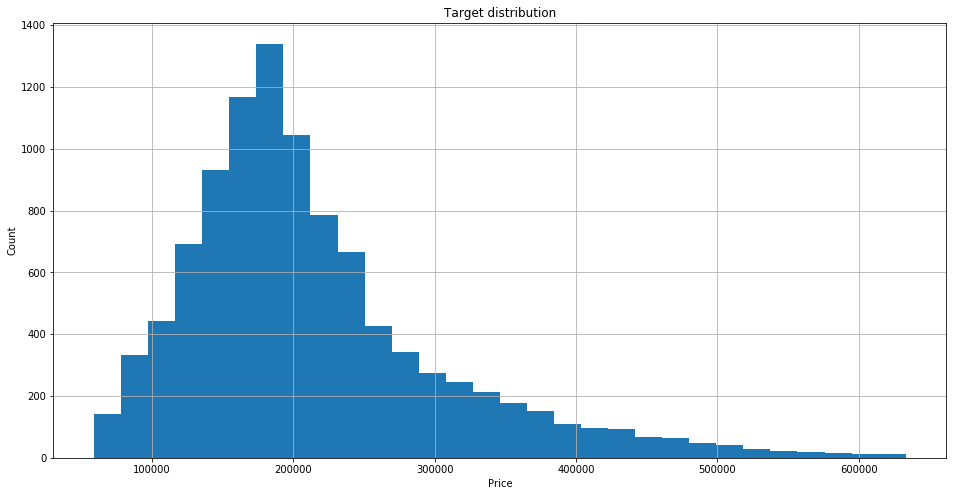

In [105]:
plt.figure(figsize = (16, 8))

df_train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

#### Матрица корреляций

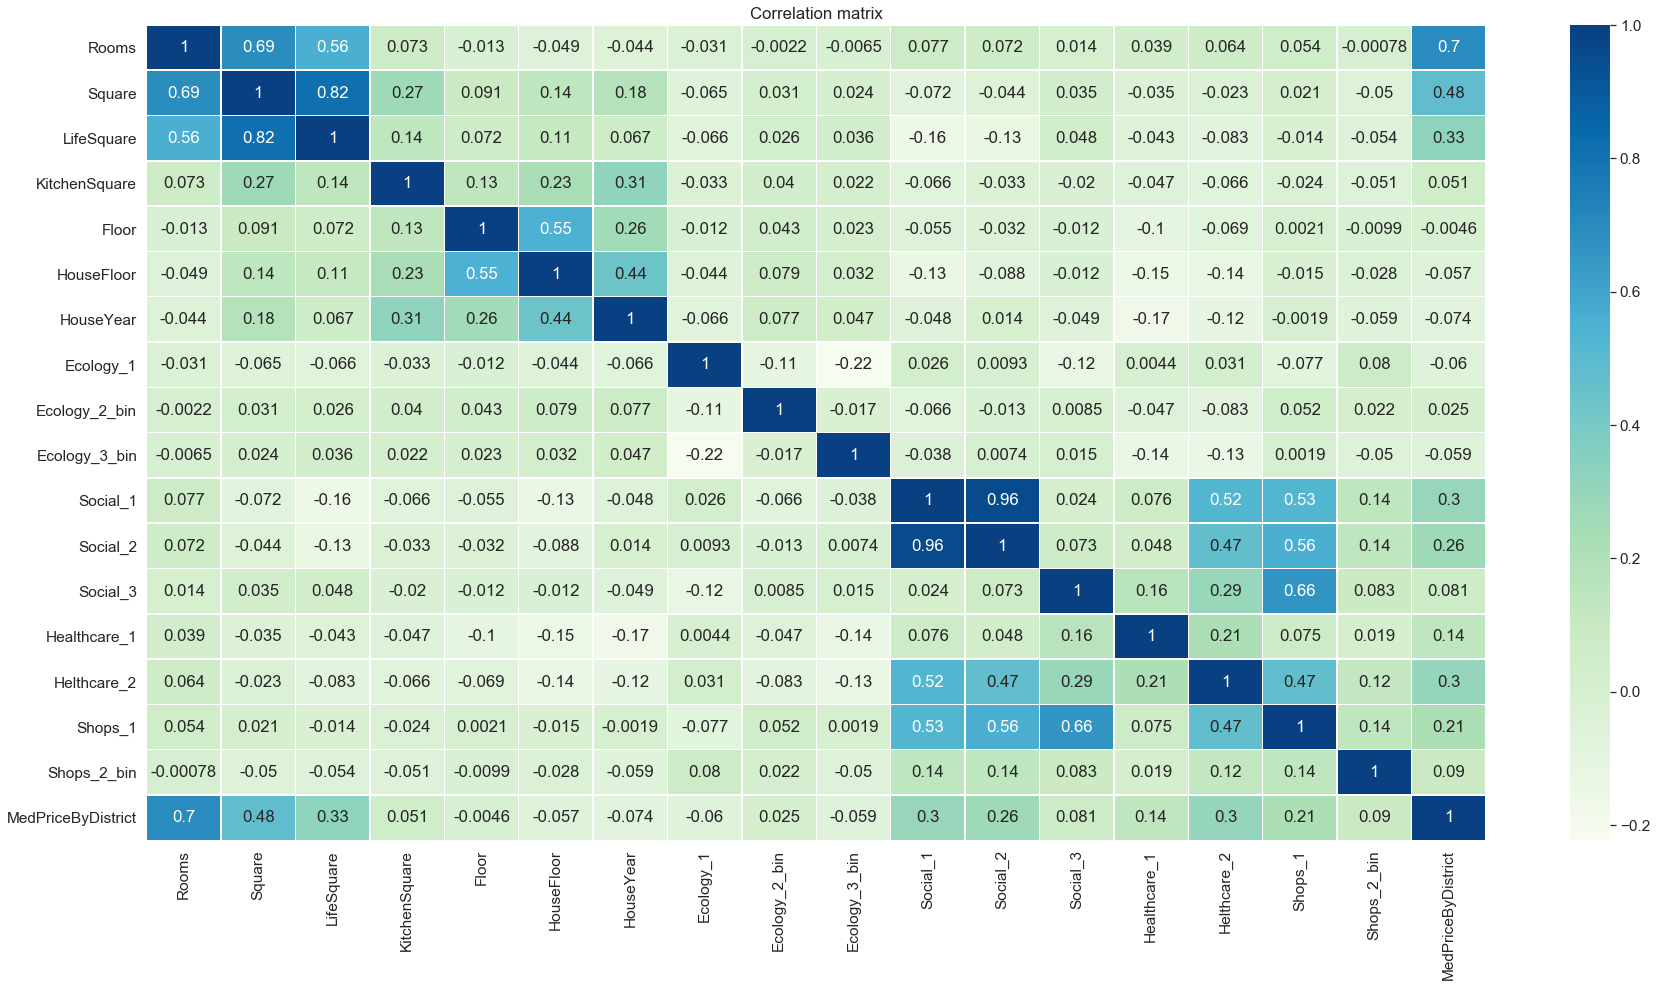

In [106]:
plt.figure(figsize = (30,15))

sns.set(font_scale=1.4)
sns.heatmap(df_train[features_names].corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Модель

#### Разбиение тренировочного датасета на тренировочную и валидационную выборки

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_train[features_names + new_feature_names], df_train[target], test_size=0.3)

In [138]:
X_test = df_test[features_names + new_feature_names]

In [127]:
forest = RandomForestRegressor(max_depth=16, 
                               max_features=7, 
                               n_estimators=1000,
                               random_state=42)

In [128]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [132]:
y_valid_preds = forest.predict(X_valid)

r2(y_valid, y_valid_preds)

0.7571799935555024

In [139]:
y_test_preds = forest.predict(X_test)

### Сохранение

In [143]:
df_test[target] = y_test_preds

In [144]:
df_test[['Id', 'Price']].to_csv('C:\\Users\\ELENA\\Downloads\\submission.csv', index=None)